# 分類問題のチュートリアルをやってみる

「[はじめてのニューラルネットワーク：分類問題の初歩  |  TensorFlow Core](https://www.tensorflow.org/tutorials/keras/classification?hl=ja)」をやっていきます。

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

# ヘルパーライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


Fashion MNIST（[zalandoresearch/fashion-mnist: A MNIST-like fashion product database. Benchmark](https://github.com/zalandoresearch/fashion-mnist)）を使っていくよ。

## データを眺める

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

ラベルは0〜9の数字になっているので、文字列のマッピングを作っておくよ。

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

データの中身を見ていくよ。まずは訓練データから。

In [4]:
train_images.shape

(60000, 28, 28)

28列*28行からなる画像データが60,000枚分あるみたい。

In [5]:
len(train_labels)

60000

当然ラベルも同じく60,000件。

次はテストデータ。

In [6]:
test_images.shape

(10000, 28, 28)

テストデータは10,000件。

## データの前処理

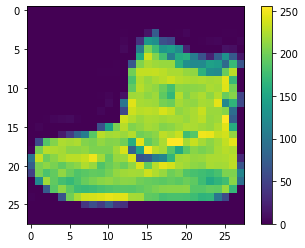

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

値を0〜1の範囲にスケールするために、255で割る。

In [8]:
train_images = train_images / 255.0
test_images  = test_images  / 255.0

表示してみる。

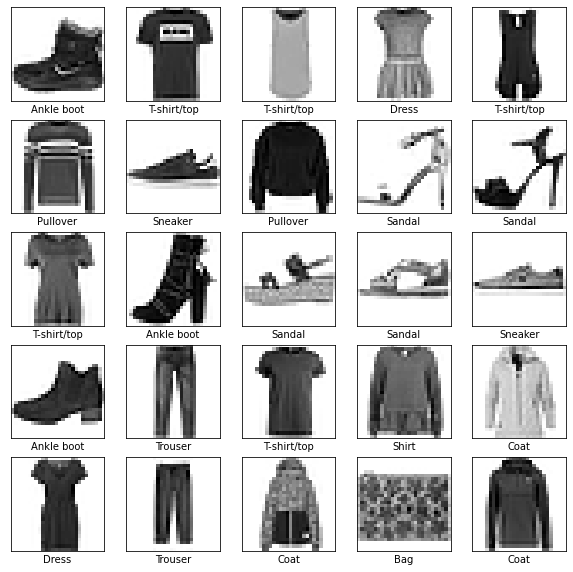

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## モデルの構築

いよいよモデルを作っていく。

1. 入力層
  * 入力は28×28=784次元
2. 隠れ層
  * ニューロンの数は128
  * 活性化関数はReLU
3. 出力層
  * ニューロンの数は10
  * 活性化関数はソフトマックス

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

モデルへの設定追加。

1. 損失関数:sparse_categorical_crossentropy
  * [目的関数 - Keras Documentation](https://keras.io/ja/objectives/)
2. オプティマイザ: Adam
  * なんか学習率を最初は大きく、だんだん小さくしていくやつだっけ
3. メトリクス: accuracy（正解率）をここでは使う

In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

いよいよモデルの学習。

訓練用データで学習させた後、テスト用データで検証する。

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 873us/step - loss: 0.4966 - accuracy: 0.82630s - loss: 0.5086 - accuracy: 0.82 - ETA: 0s - loss: 0.5068 - accura
Epoch 2/5
1875/1875 [==============================] - 2s 895us/step - loss: 0.3755 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 2s 873us/step - loss: 0.3381 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3125 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 2s 964us/step - loss: 0.2950 - accuracy: 0.8913


5エポックやってみると、正解率は約89%になった。

次に、テストデータで検証してみよう。

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3591 - accuracy: 0.8719

Test accuracy: 0.8719000220298767


テストデータでの正解率は87.5%で、訓練用データでの89%に比べて低い。

しかし、[チュートリアル](https://www.tensorflow.org/tutorials/keras/classification?hl=ja#%E6%AD%A3%E8%A7%A3%E7%8E%87%E3%81%AE%E8%A9%95%E4%BE%A1)だと過学習が起きてるというけど、1．5%違ってても過学習といえるのかな……。たまたまなこともありそうだけど。

## モデルを使って予測する

過学習はとりあえず置いといて、予測してみる。

In [14]:
predictions = model.predict(test_images)
predictions[0]

array([5.0523308e-06, 4.6101755e-07, 1.1879752e-06, 1.8929949e-08,
       1.0925197e-05, 1.6392237e-03, 3.1186678e-06, 8.8290095e-02,
       2.4162817e-05, 9.1002572e-01], dtype=float32)

予測結果はソフトマック関数で10個分出力された、それぞれのカテゴリへの確信度を表している。

なので、一番確信度が高いラベルが予測結果になる。

In [15]:
np.argmax(predictions[0])

9

実際正しいかどうか、テストデータを見てみる。

In [16]:
test_labels[0]

9

わーい、あたった〜。

予測の結果を可視化してみよう。

In [17]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

これは0番目。

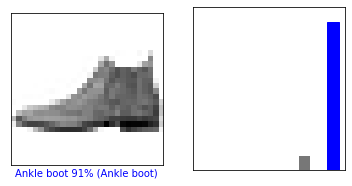

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

これは12番目。

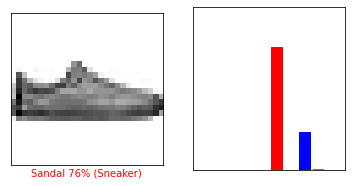

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

↑これ、スニーカーなのにサンダルと分類してしまったのか。でも、グラフ的にはスニーカーの確信度もわりと高いな。

もう少し出してみる正しい予測は青、間違った予測は赤で表示する。

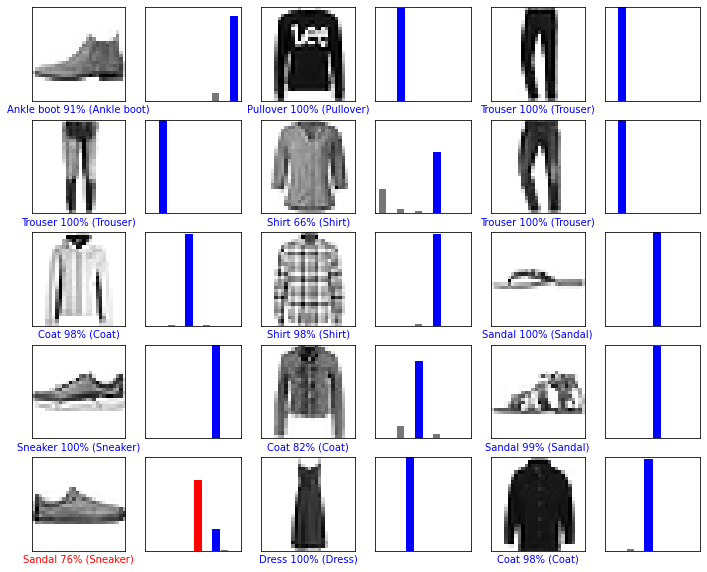

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

このモデルを使って1枚の画像に対する予測を行う（APIみたいなやつで使えそうな設定だ）。

`tf.keras`のモデルはバッチで予測を行うように作られているので、1枚の画像でもリスト化してやらないとならない（いい感じにして欲しい……）。

In [21]:
# テスト用データセットから画像を1枚取り出す
img = test_images[0]
print(img.shape)

# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img,0))
print(img.shape)

# 予測を行う
predictions_single = model.predict(img)
print(predictions_single)

(28, 28)
(1, 28, 28)
[[5.0523213e-06 4.6101798e-07 1.1879763e-06 1.8929912e-08 1.0925197e-05
  1.6392245e-03 3.1186619e-06 8.8290095e-02 2.4162793e-05 9.1002572e-01]]


確信度をグラフにしてみよう。

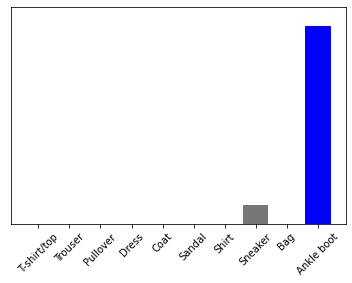

In [22]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

予測結果はラベル9のAnkle bootでした。